In [1]:
"""
From: 
https://www.kaggle.com/code/poonaml/deep-neural-network-keras-way/notebook
"""

'\nFrom: \nhttps://www.kaggle.com/code/poonaml/deep-neural-network-keras-way/notebook\n'

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator

In [4]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "\input"]).decode("utf8")) # faill

In [5]:
train = pd.read_csv("./input/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test= pd.read_csv("./input/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values

In [8]:
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits

In [9]:
X_test = test.values.astype('float32')

In [10]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

### Data Visualization

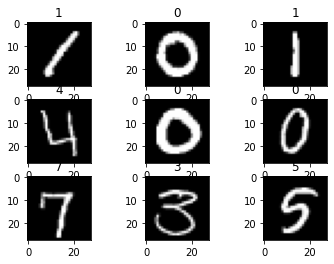

In [12]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(0, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [13]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape


(42000, 28, 28, 1)

In [14]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape


(28000, 28, 28, 1)

## Preprocessing the digit images
- Feature Standardization
    - It is important preprocessing step. It is used to centre the data around zero mean and unit variance.


In [15]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x - mean_px)/std_px

## One Hot encoding of labels.
A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

For example, 3 would be [0,0,0,1,0,0,0,0,0,0]

In [16]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

Lets plot 10th label.

C:\Users\tongn\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


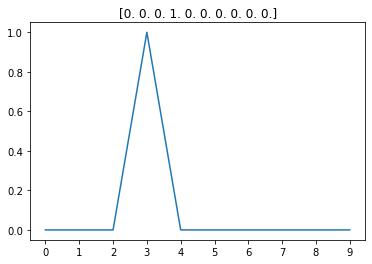

In [17]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

## Designing Neural Network Architecture

In [18]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

### Linear Model

In [19]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

Lets create a simple model from Keras Sequential layer.

1. Lambda layer performs simple arithmetic operations like sum, average, exponentiation etc.
In 1st layer of the model we have to define input dimensions of our data in (rows,columns,colour channel) format. (In theano colour channel comes first)

2. Flatten will transform input into 1D array.
3. Dense is fully connected layer that means all neurons in previous layers will be connected to all neurons in fully connected layer. In the last layer we have to specify output dimensions/classes of the model. Here it's 10, since we have to output 10 different digit labels.


In [20]:
model = Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


## Compile network
Before making network ready for training we have to make sure to add below things:

1. A loss function: to measure how good the network is

2. An optimizer: to update network as it sees more data and reduce loss value

3. Metrics: to monitor performance of network



In [21]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

C:\Users\tongn\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

### Cross Validation

In [23]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [60]:
history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                    validation_data=val_batches, validation_steps=val_batches.n)

C:\Users\tongn\AppData\Local\Temp\ipykernel_15036\473829781.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3,


Epoch 1/3
42000/42000 [==============================] - 40s 943us/step - loss: 0.0435 - accuracy: 0.9869 - val_loss: 0.1487 - val_accuracy: 0.9571


In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
history_dict

{'loss': [0.44537216424942017],
 'accuracy': [0.8658994436264038],
 'val_loss': [0.32454049587249756],
 'val_accuracy': [0.9054762125015259]}

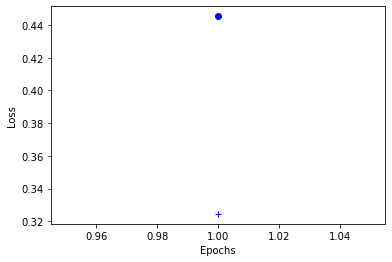

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

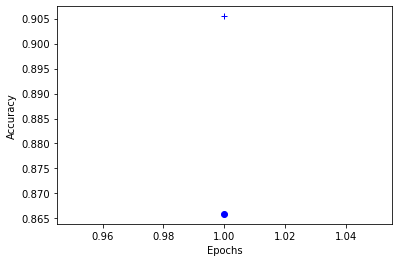

In [28]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

### Fully Connected Model
Neurons in a fully connected layer have full connections to all activations in the previous layer, as seen in regular Neural Networks. Adding another Dense Layer to model.



In [29]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [30]:
fc = get_fc_model()
fc.optimizer.lr=0.01

In [31]:
history = fc.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)


C:\Users\tongn\AppData\Local\Temp\ipykernel_15036\3845677245.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = fc.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1,


37800/37800 [==============================] - 3s 71us/step - loss: 0.3786 - accuracy: 0.9094 - val_loss: 0.2336 - val_accuracy: 0.9321


### Convolutional Neural Network

CNNs are extremely efficient for images.



In [32]:
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [33]:
model = get_cnn_model()

In [34]:
model.optimizer.lr=0.01

In [35]:
len(batches)

591

In [36]:
val_batches.n

4200

In [37]:
history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)


C:\Users\tongn\AppData\Local\Temp\ipykernel_15036\3469616667.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1,


37800/37800 [==============================] - 22s 577us/step - loss: 2.3172 - accuracy: 0.1080 - val_loss: 2.2997 - val_accuracy: 0.1121


In [38]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Data Augmentation

It is tehnique of showing slighly different or new images to neural network to avoid overfitting. And to achieve better generalization. In case you have very small dataset, you can use different kinds of data augmentation techniques to increase your data size. Neural networks perform better if you provide them more data.

Different data aumentation techniques are as follows:

1. Cropping
2. Rotating
3. Scaling
4. Translating
5. Flipping
6. Adding Gaussian noise to input images etc.


In [39]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)


In [40]:
model.optimizer.lr=0.001

history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)


    3/37800 [..............................] - ETA: 23:33 - loss: 2.3062 - accuracy: 0.1042

C:\Users\tongn\AppData\Local\Temp\ipykernel_15036\2813870299.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1,


37800/37800 [==============================] - 23s 597us/step - loss: 2.3016 - accuracy: 0.1115 - val_loss: 2.2999 - val_accuracy: 0.1121


In [41]:
predictions = model.predict(X_test)
predictions

875/875 [==============================] - 5s 5ms/step


array([[0.09792109, 0.11178162, 0.09851178, ..., 0.10536173, 0.09699613,
        0.10142542],
       [0.09792109, 0.11178162, 0.09851178, ..., 0.10536173, 0.09699613,
        0.10142542],
       [0.09792109, 0.11178162, 0.09851178, ..., 0.10536173, 0.09699613,
        0.10142542],
       ...,
       [0.09792109, 0.11178162, 0.09851178, ..., 0.10536173, 0.09699613,
        0.10142542],
       [0.09792109, 0.11178162, 0.09851178, ..., 0.10536173, 0.09699613,
        0.10142542],
       [0.09792109, 0.11178162, 0.09851178, ..., 0.10536173, 0.09699613,
        0.10142542]], dtype=float32)

In [42]:
history.history

{'loss': [2.301572322845459],
 'accuracy': [0.1114550232887268],
 'val_loss': [2.299880266189575],
 'val_accuracy': [0.11214285343885422]}

### Adding Batch Normalization
BN helps to fine tune hyperparameters more better and train really deep neural networks.

In [43]:
from tensorflow.keras.layers import BatchNormalization

def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [44]:
model = get_bn_model()
model.optimizer.lr = 0.01
history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)


C:\Users\tongn\AppData\Local\Temp\ipykernel_15036\1509639493.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1,


37800/37800 [==============================] - 36s 922us/step - loss: 0.2346 - accuracy: 0.9345 - val_loss: 0.1157 - val_accuracy: 0.9693


In [45]:
len(batches)

591

In [46]:
history.history

{'loss': [0.23455902934074402],
 'accuracy': [0.9345238208770752],
 'val_loss': [0.11572317779064178],
 'val_accuracy': [0.9692857265472412]}

### Submitting Predictions to Kaggle
Make sure you use full train dataset here to train model and predict on test set.

In [47]:
model.optimizer.lr = 0.01
gen = image.ImageDataGenerator()
batches = gen.flow(X, y, batch_size=64)
history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=5, verbose=0)

C:\Users\tongn\AppData\Local\Temp\ipykernel_15036\3423244823.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=5, verbose=0)


In [48]:
#history = model.fit(batches, steps_per_epoch=batches.n, epochs=5)

In [49]:
predictions = model.predict(X_test)

875/875 [==============================] - 8s 8ms/step


In [50]:
#history = model.fit(X, y, epochs=5, verbose=0)

In [51]:
predictions = model.predict(X_test)

875/875 [==============================] - 7s 8ms/step


In [52]:
predictions

array([[1.4608172e-11, 2.3072710e-11, 1.0000000e+00, ..., 9.3320702e-09,
        9.8781779e-13, 5.2454856e-11],
       [9.9999464e-01, 6.6283540e-10, 2.0247851e-08, ..., 2.2391005e-08,
        1.4677911e-08, 1.8216801e-06],
       [9.8658477e-09, 4.0648529e-09, 1.5390403e-06, ..., 9.0799217e-09,
        5.7573693e-06, 9.9974459e-01],
       ...,
       [6.8267402e-18, 9.5286461e-12, 5.7005919e-15, ..., 9.7588116e-13,
        2.3376250e-13, 1.2439191e-12],
       [1.7641440e-08, 1.8346784e-08, 1.8066238e-08, ..., 1.3002172e-07,
        1.5312226e-07, 9.9989390e-01],
       [4.5360402e-15, 3.7249680e-14, 1.0000000e+00, ..., 3.4298793e-11,
        6.6755385e-13, 5.5972174e-14]], dtype=float32)

In [53]:
# for i in range(0,1):
# # 	print("X=%s, Predicted=%s" % (X_test[i], predictions[i]))
#     print("Predicted=%s" % (predictions[i]))
#     print(len(predictions[i]))

In [54]:
len(X[0][0])

28

In [55]:
len(predictions[0])

10

In [56]:
len(predictions.tolist())

28000

In [57]:
prdictList = []
for i in range(0,len(predictions)):
    prdictList.append(np.argmax(predictions[i]).astype(int))

In [58]:
submissions = pd.DataFrame({
    "ImageId": list(range(1,len(predictions) + 1)),
    "Label": prdictList,
})
submissions.to_csv("DR.csv", index=False, header=True)

More to come . Please upvote if you find it useful.

You can increase number of epochs on your GPU enabled machine to get better results.

In [59]:
#int(1.9)

More to come . Please upvote if you find it useful.

You can increase number of epochs on your GPU enabled machine to get better results.